In [1]:
from google.cloud import bigquery
from google.colab import auth
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
auth.authenticate_service_account()

Successfully saved credentials for test-597@sensei-project-test-441408.iam.gserviceaccount.com


In [3]:
project_id = "sensei-project-test-441408"
client = bigquery.Client(project=project_id)

In [4]:
x = """
SELECT *
FROM `sensei-project-test-441408.Netflix.Userbase`
"""

df_userbase = client.query(x).to_dataframe()
df_userbase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month


In [5]:
x = """
SELECT *
FROM `sensei-project-test-441408.Netflix.Pricing`
"""

df_pricing = client.query(x).to_dataframe()
df_pricing

,Country,Eco,Mid,Premium
0,Argentina,1.95,3.31,4.73
1,Egypt,2.27,3.88,5.34
2,India,2.40,6.02,7.83
3,Colombia,4.29,6.83,9.87
4,Philippines,4.45,7.13,9.81
5,Indonesia,4.13,7.62,11.82
6,Afghanistan,3.99,7.99,9.99
7,Algeria,3.99,7.99,9.99
8,Ecuador,4.99,7.99,10.99
9,Brazil,5.22,8.05,11.27


In [6]:
df_userbase.describe()

,User ID,Monthly Revenue,Age
count,2500.0,2500.0,2500.0
mean,1250.5,12.5084,38.7956
std,721.83216,1.686851,7.171778
min,1.0,10.0,26.0
25%,625.75,11.0,32.0
50%,1250.5,12.0,39.0
75%,1875.25,14.0,45.0
max,2500.0,15.0,51.0


In [7]:
df_userbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   Int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   Int64 
 3   Join Date          2500 non-null   dbdate
 4   Last Payment Date  2500 non-null   dbdate
 5   Country            2500 non-null   object
 6   Age                2500 non-null   Int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: Int64(3), dbdate(2), object(5)
memory usage: 202.8+ KB


In [8]:
df_userbase['Subscription Type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [9]:
df_userbase['Join Date'] = pd.to_datetime(df_userbase['Join Date'])
df_userbase['Last Payment Date'] = pd.to_datetime(df_userbase['Last Payment Date'])

In [10]:
dict_gender = {'Male' : 1,  'Female' : 2}
dict_device = {'Smartphone': 1, 'Laptop': 2, 'Smart TV':3, 'Tablet':4}
dict_subscription = {'Basic': 1, 'Premium': 2, 'Standard': 3}

In [11]:
df_userbase['encode_gender'] = df_userbase['Gender'].map(dict_gender)
df_userbase['encode_device'] = df_userbase['Device'].map(dict_device)
df_userbase['encode_subscription'] = df_userbase['Subscription Type'].map(dict_subscription)
df_userbase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,encode_gender,encode_device,encode_subscription
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1,1,1
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,1,2,2
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,1,1,2
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,1,3,2
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,2,1,1
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,1,1,2
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2,1,3
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1,2,1


In [12]:
df_userbase["device_category"] = df_userbase["Device"].astype('category').cat.codes

In [13]:
df_userbase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,encode_gender,encode_device,encode_subscription,device_category
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1,1,1,2
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,1,2,2,0
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,1,1,2,2
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,1,3,2,1
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,2,1,1,2
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,1,1,2,2
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2,1,3,2
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1,2,1,0


In [14]:
a = df_userbase['Age']
x = df_userbase['encode_gender']
y = df_userbase['encode_device']
z = df_userbase['encode_subscription']

In [15]:
a.corr(z)

0.009398592932096592

In [16]:
x.corr(y)

0.014282794245723212

In [17]:
y.corr(x)

0.014282794245723214

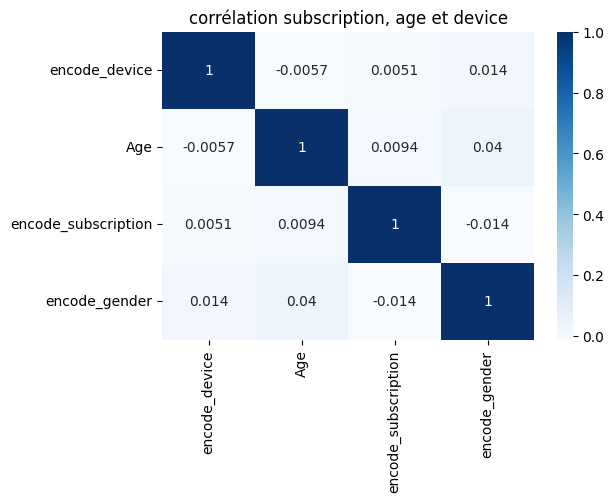

In [24]:
combined_correlation = df_userbase[['encode_device', "Age", "encode_subscription", "encode_gender"]].corr() # Corrélation des trois colonnes sur le graphique.

# Paramètre du graphique :

plt.figure(figsize=(6,4))
sns.heatmap(combined_correlation, annot=True, cmap="Blues")

plt.title("corrélation subscription, age et device")
plt.show()

In [18]:
df_userbase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,encode_gender,encode_device,encode_subscription,device_category
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1,1,1,2
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,1,2,2,0
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,1,1,2,2
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,1,3,2,1
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,2,1,1,2
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,1,1,2,2
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2,1,3,2
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1,2,1,0


In [23]:
date_seuil = df_userbase['Last Payment Date'].max()
periode_seuil = date_seuil.to_period('M')
print(periode_seuil)

2023-07


In [25]:
df_userbase['is active'] = df_userbase['Last Payment Date'].dt.to_period('M') >= periode_seuil
df_userbase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,encode_gender,encode_device,encode_subscription,device_category,is active
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1,1,1,2,False
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,1,2,2,0,False
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,1,1,2,2,False
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,1,3,2,1,False
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,1,1,2,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,2,1,1,2,True
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,1,1,2,2,True
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2,1,3,2,True
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1,2,1,0,True


In [41]:
df_userbase["is active"].value_counts()

,count
is active,
True,1634
False,866


In [42]:
df_userbase['signup month'] = df_userbase['Join Date'].dt.to_period('M')
df_userbase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,encode_gender,encode_device,encode_subscription,device_category,is active,signup month
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1,1,1,2,False,2022-08
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,1,2,2,0,False,2022-06
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,1,1,2,2,False,2022-11
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,1,3,2,1,False,2022-08
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,1,1,2,2,False,2022-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,2,1,1,2,True,2022-08
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,1,1,2,2,True,2022-07
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2,1,3,2,True,2022-11
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1,2,1,0,True,2022-07


In [46]:
cohort_signup = df_userbase.groupby('signup month')['is active'].count().reset_index()
cohort_signup.rename(columns={"is active" : "size"}, inplace=True)
cohort_signup

,signup month,size
0,2021-09,3
1,2021-10,3
2,2021-11,4
3,2021-12,4
4,2022-01,8
5,2022-02,5
6,2022-03,13
7,2022-04,19
8,2022-05,40
9,2022-06,295


In [49]:
active_user = df_userbase.groupby('signup month')['is active'].sum().reset_index()
active_user

,signup month,is active
0,2021-09,0
1,2021-10,0
2,2021-11,0
3,2021-12,0
4,2022-01,0
5,2022-02,0
6,2022-03,0
7,2022-04,0
8,2022-05,0
9,2022-06,140


In [51]:
total = pd.merge(cohort_signup,active_user, on="signup month")
total['retention_rate'] = (total['is active']/total['size'])*100
total

,signup month,size,is active,retention_rate
0,2021-09,3,0,0.000000
1,2021-10,3,0,0.000000
2,2021-11,4,0,0.000000
3,2021-12,4,0,0.000000
4,2022-01,8,0,0.000000
5,2022-02,5,0,0.000000
6,2022-03,13,0,0.000000
7,2022-04,19,0,0.000000
8,2022-05,40,0,0.000000
9,2022-06,295,140,47.457627


In [56]:
seuil = [0, 18, 25, 35, 45, 55, 65, 200]
tags = ["-18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

df_userbase['cat_age'] = pd.cut(df_userbase['Age'], bins=seuil, labels=tags, right=False)

df_userbase

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,encode_gender,encode_device,encode_subscription,device_category,is active,signup month,cat_age
0,14,Basic,10,2022-08-01,2023-06-26,Australia,27,Male,Smartphone,1 Month,1,1,1,2,False,2022-08,25-34
1,104,Premium,10,2022-06-08,2023-06-25,Australia,38,Male,Laptop,1 Month,1,2,2,0,False,2022-06,35-44
2,114,Premium,10,2022-11-18,2023-06-25,Australia,48,Male,Smartphone,1 Month,1,1,2,2,False,2022-11,45-54
3,144,Premium,10,2022-08-17,2023-06-26,Australia,33,Male,Smart TV,1 Month,1,3,2,1,False,2022-08,25-34
4,264,Premium,10,2022-08-09,2023-06-27,Australia,51,Male,Smartphone,1 Month,1,1,2,2,False,2022-08,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2411,Basic,15,2022-08-02,2023-07-11,United States,37,Female,Smartphone,1 Month,2,1,1,2,True,2022-08,35-44
2496,2426,Premium,15,2022-07-23,2023-07-12,United States,51,Male,Smartphone,1 Month,1,1,2,2,True,2022-07,45-54
2497,2453,Standard,15,2022-11-06,2023-07-11,United States,48,Female,Smartphone,1 Month,2,1,3,2,True,2022-11,45-54
2498,2483,Basic,15,2022-07-28,2023-07-11,United States,42,Male,Laptop,1 Month,1,2,1,0,True,2022-07,35-44


In [61]:
cohort_age = df_userbase.groupby("cat_age").agg(size=("User ID", "count"),active=("is active" , "sum")).reset_index()

<ipython-input-61-9252f8c4a9eb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_age = df_userbase.groupby("cat_age").agg(size=("User ID", "count"),active=("is active" , "sum")).reset_index()


In [87]:
for x in range(len(cohort_age)):
  print(x)
  if cohort_age['size'].loc[x] != 0:
    cohort_age['retention'].loc[x] = (cohort_age['active'].loc[x]/cohort_age['size'].loc[x])*100
  else:
    cohort_age['retention'].loc[x] = 0


0
1
2
3
4
5
6


<ipython-input-87-f3adaf69a658>:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  cohort_age['retention'][x] = 0
<ipython-input-87-f3adaf69a658>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting va

FICHER .py

In [91]:
from google.cloud import bigquery
from google.colab import auth
import pandas as pd

auth.authenticate_service_account()
project_id = "sensei-project-test-441408"
client = bigquery.Client(project=project_id)

x = """
SELECT *
FROM `sensei-project-test-441408.Netflix.Userbase`
"""
df_userbase = client.query(x).to_dataframe()

df_userbase['Join Date'] = pd.to_datetime(df_userbase['Join Date'])
df_userbase['Last Payment Date'] = pd.to_datetime(df_userbase['Last Payment Date'])
date_seuil = df_userbase['Last Payment Date'].max()
periode_seuil = date_seuil.to_period('M')
df_userbase['is active'] = df_userbase['Last Payment Date'].dt.to_period('M') >= periode_seuil
df_userbase['signup month'] = df_userbase['Join Date'].dt.to_period('M')

cohort_signup = df_userbase.groupby('signup month')['is active'].count().reset_index()
cohort_signup.rename(columns={"is active" : "size"}, inplace=True)
active_user = df_userbase.groupby('signup month')['is active'].sum().reset_index()
total = pd.merge(cohort_signup,active_user, on="signup month")
total['retention_rate'] = (total['is active']/total['size'])*100

job_config = bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE")
destination_id = "sensei-project-test-441408.Import_Spotify.retention"
job = client.load_table_from_dataframe(total, destination_id, job_config=job_config)

/usr/local/lib/python3.11/dist-packages/google/cloud/bigquery/_pandas_helpers.py:570: UserWarning: Pyarrow could not determine the type of columns: signup month.
  warnings.warn(
